<a href="https://colab.research.google.com/github/vvvvvvss/KMeansClustering/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

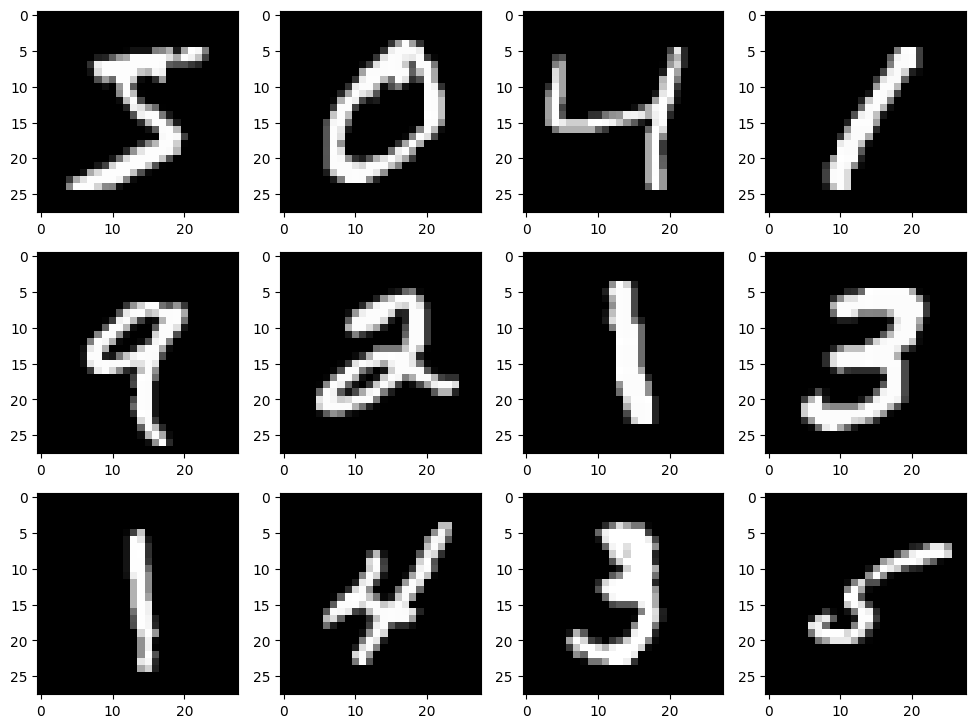

In [13]:
plt.gray()
plt.figure(figsize=(12,12))
for i in range(12):
 plt.subplot(4,4,i+1)
 plt.imshow(x_train[i])

In [14]:
for i in range(4):
  print(y_train[i])


5
0
4
1


In [15]:
print(x_train.min())
print(x_train.max())

0
255


In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
print(x_train.min())
print(x_train.max())
#Successful conversion of data from 3D to 2D

0.0
1.0


In [21]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [22]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [24]:
total_clusters = len(np.unique(y_test))

In [25]:
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

In [26]:
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [27]:
kmeans.labels_

array([9, 5, 1, ..., 4, 7, 2], dtype=int32)

In [29]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [31]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]
print(reference_labels)

{0: 3, 1: 4, 2: 1, 3: 7, 4: 7, 5: 0, 6: 6, 7: 2, 8: 1, 9: 3}


In [33]:
print(number_labels[:20].astype(int))
print(y_train[:20])

[3 0 4 1 7 2 1 3 1 7 3 1 3 2 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [36]:
print(accuracy_score(number_labels,y_train))

0.48065


In [38]:

cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  kmeans = MiniBatchKMeans(n_clusters = i)
  kmeans.fit(X_train)


In [52]:
def calculate_metrics(model,output):
 print('Number of clusters : {} '.format(model.n_clusters))
 print('Inertia : {} '.format(model.inertia_))
 print('Homogeneity : {} '.format(metrics.homogeneity_score(output,model.labels_)))

In [53]:
calculate_metrics(kmeans,y_train)
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))


Number of clusters : 256 
Inertia : 1506984.125 
Homogeneity : 0.8436400127255403 


In [47]:
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]


In [49]:
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')

Accuracy score : 0.8984833333333333


